In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv(os.path.join(unsdsn_world_happiness_path, '2016.csv'), delimiter=',', nrows = nRowsRead)
df2.dataframeName = '2016.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 157 rows and 13 columns


In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv(os.path.join(unsdsn_world_happiness_path, '2016.csv'), delimiter=',', nrows = nRowsRead)
df2.dataframeName = '2016.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 157 rows and 13 columns


# 1. Contexte du Projet: Analyse et Prédiction du Bonheur Mondial 🌍

**Problématique :** Il s'agit d'une tâche de **Régression**. L'objectif est de modéliser et de prédire le **Score de Bonheur** d'un pays en se basant sur des facteurs socio-économiques et politiques (PIB, Soutien familial, Santé, etc.), en utilisant les données du Rapport Mondial sur le Bonheur 2016.

**Target (Variable Cible) :** `Happiness Score`
**Features (Variables Prédictives) :** `Economy (GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Generosity`, `Trust (Government Corruption)`.

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
unsdsn_world_happiness_path = kagglehub.dataset_download('unsdsn/world-happiness')

print('Data source import complete.')


100%|██████████| 36.8k/36.8k [00:00<00:00, 20.8MB/s]

Extracting files...
Data source import complete.


## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. Click the blue "Edit Notebook" or "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first use `matplotlib` to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made. (Hey, I'm just a kerneling bot, not a Kaggle Competitions Grandmaster!)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


There are 3 csv files in the current version of the dataset:


In [ ]:
print(os.listdir(unsdsn_world_happiness_path))

['2018.csv', '2019.csv', '2015.csv', '2017.csv', '2016.csv']


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

## 3. Analyse Exploratoire des Données (AED)

L'AED est essentielle pour identifier les relations entre les variables et justifier les choix de modélisation.

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis='columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    df = df.select_dtypes(include=[np.number]) # ensure only numeric columns are processed
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant or non-numeric columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()

    # Explicitly create figure and axes to control figsize directly
    fig, ax = plt.subplots(figsize=(graphWidth, graphWidth))

    im = ax.matshow(corr) # Plot the matrix on the created axes
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    ax.xaxis.tick_bottom()
    plt.colorbar(im, ax=ax) # Link colorbar to the matshow image and the axes
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns') # Fix: Added axis='columns'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/2015.csv

In [ ]:
import os
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv(os.path.join(unsdsn_world_happiness_path, '2015.csv'), delimiter=',', nrows = nRowsRead)
df1.dataframeName = '2015.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 158 rows and 12 columns


Let's take a quick look at what the data looks like:

In [ ]:
df1.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

Distribution graphs (histogram/bar graph) of sampled columns:

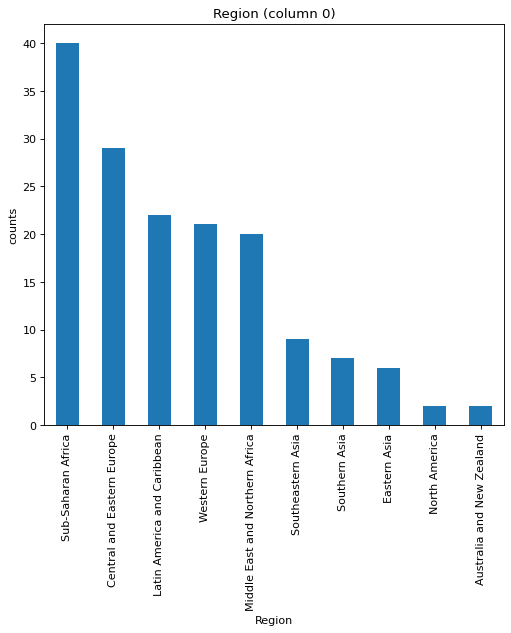

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    if nCol == 0:
        print("No columns to plot based on filtering criteria.")
        return
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow) # FIX: Ensure nGraphRow is an integer
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

### 3.1 Carte de Chaleur des Corrélations

Nous utilisons une Heatmap pour visualiser la force et la direction des relations linéaires entre toutes les paires de variables numériques.

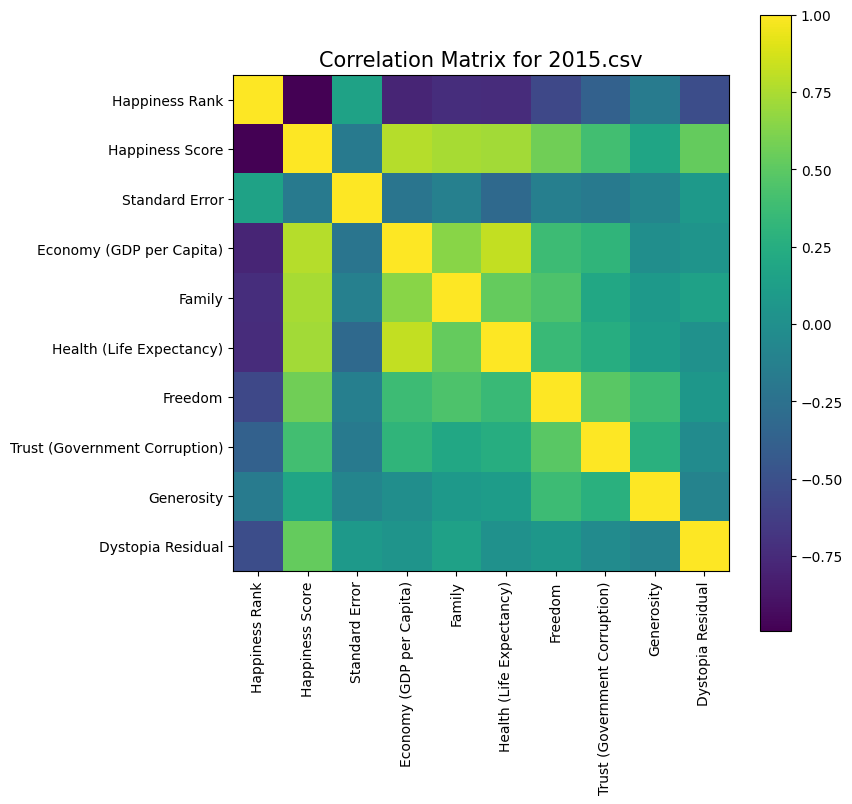

In [ ]:
plotCorrelationMatrix(df1, 8)

### Interprétation de la Heatmap (Matrice de Corrélation)

Le graphique montre que :
1.  Le **Score de Bonheur** est extrêmement corrélé positivement avec **Economy (GDP per Capita)** (Corrélation $\approx 0.79$) et **Health (Life Expectancy)** (Corrélation $\approx 0.76$). Cela indique que le bien-être économique et la santé sont les prédicteurs les plus forts.
2.  La **Famille** présente également une forte corrélation positive ($\approx 0.69$).
3.  Inversement, **Trust (Government Corruption)** a la corrélation la plus faible, suggérant que son impact est moins linéaire ou moins prononcé que les facteurs économiques.

Scatter and density plots:

### 3.2 Distributions et Relations (Pair Plots)

L'examen des distributions permet de vérifier la normalité des variables et les tendances des relations entre la cible et les features.

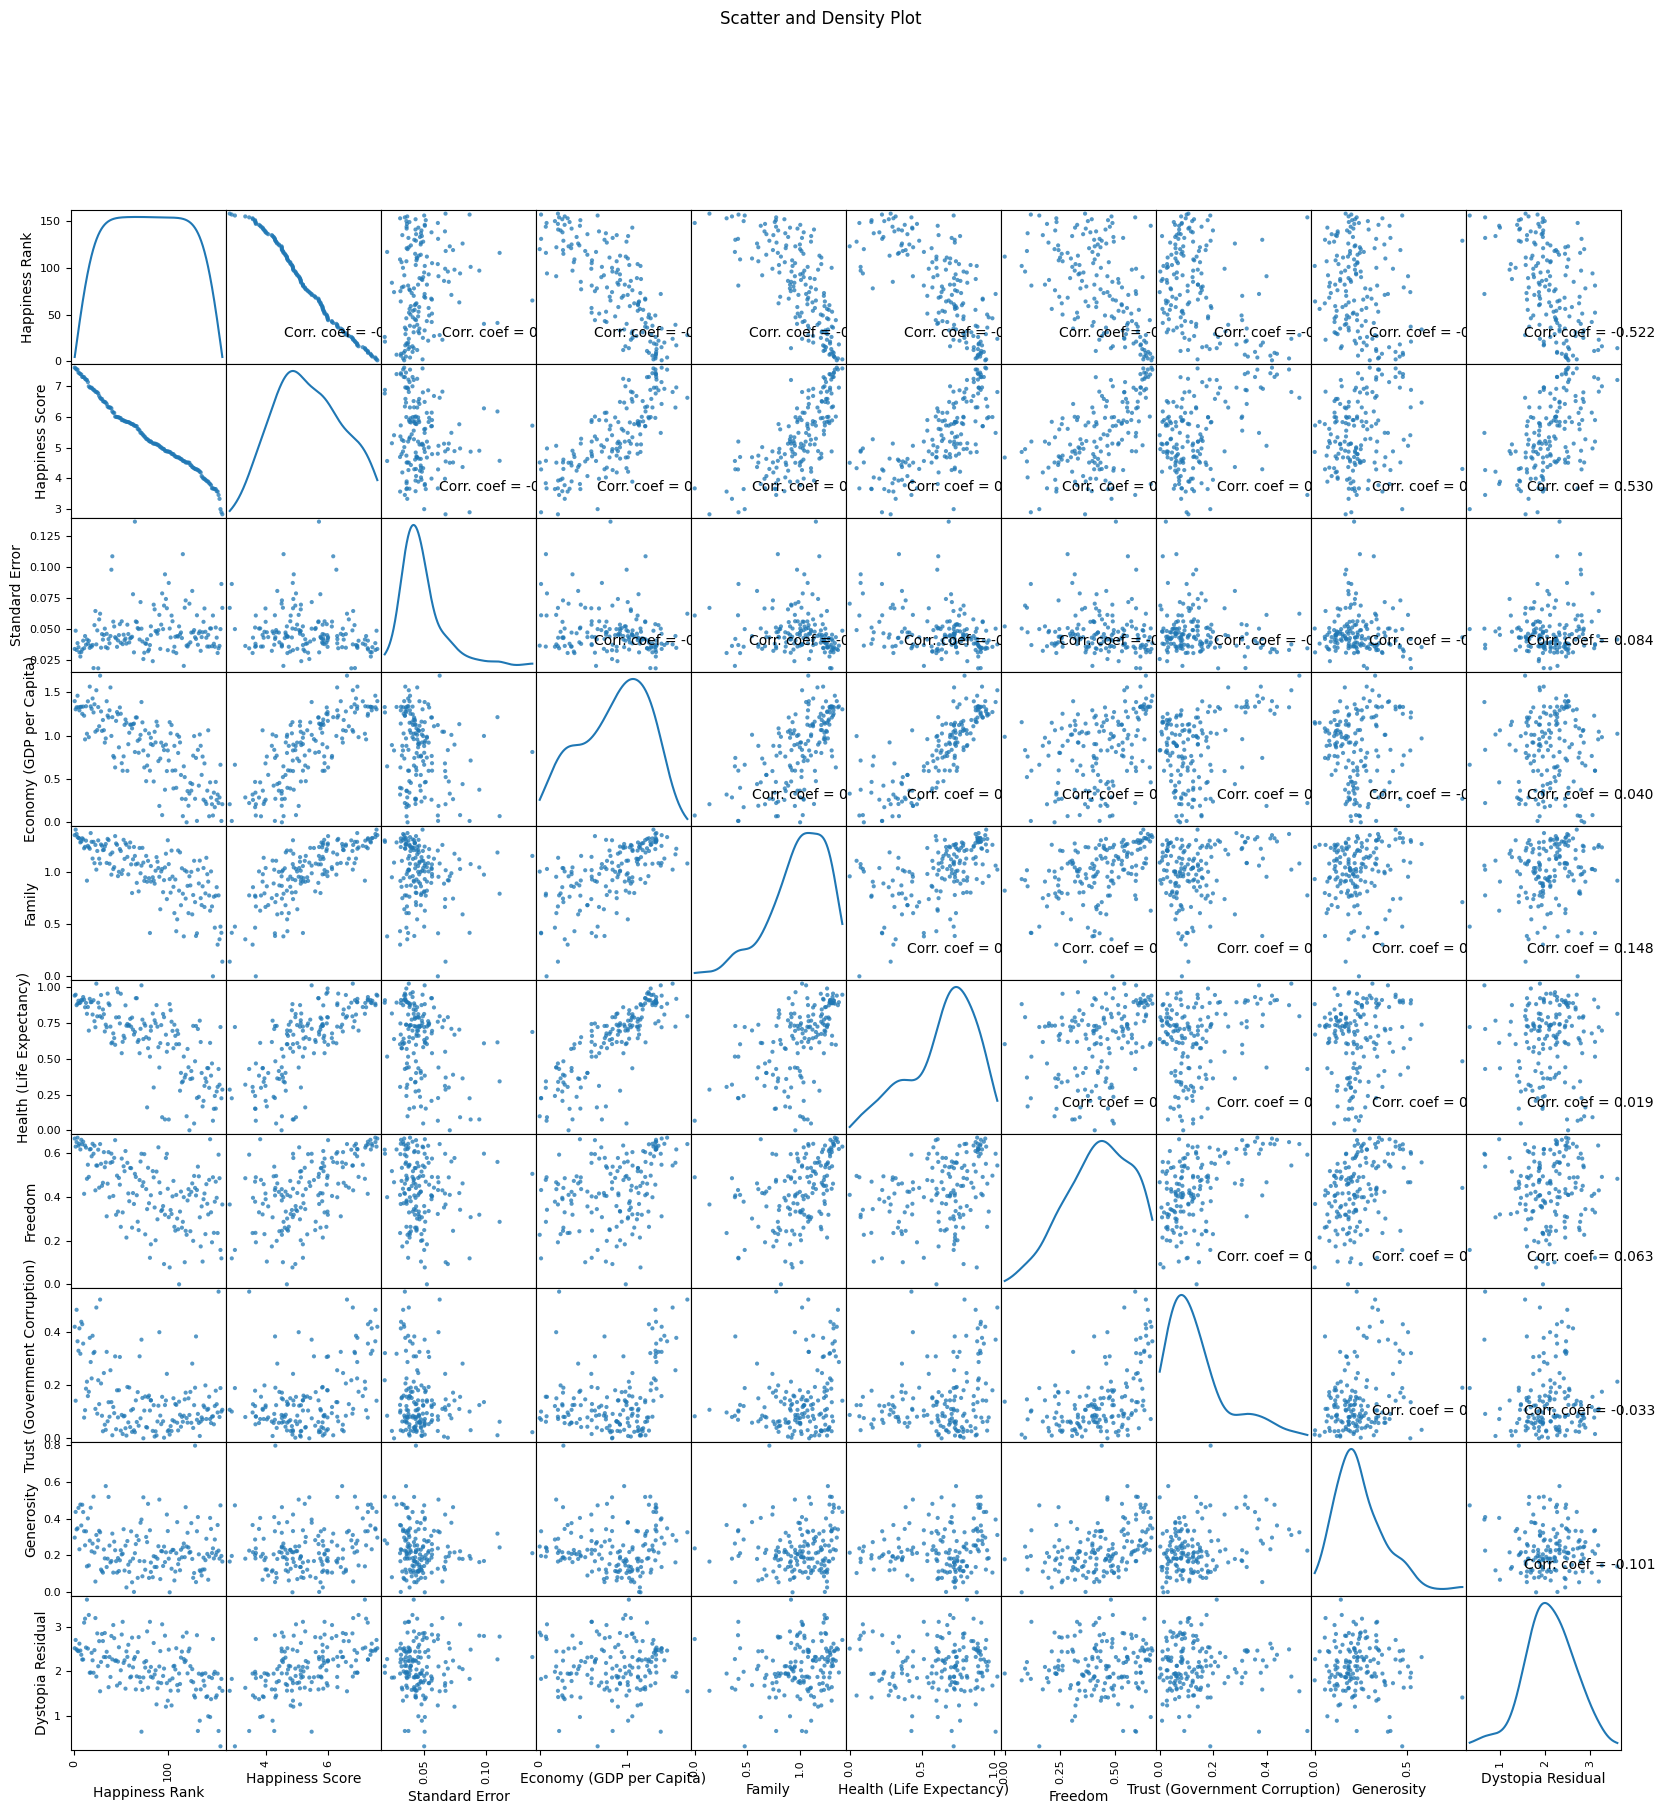

In [ ]:
plotScatterMatrix(df1, 20, 10)

### Let's check 2nd file: ../input/2016.csv

### Interprétation des Distributions

* **Distribution du Score de Bonheur :** Sa forme s'approche d'une distribution normale (ou quasi-gaussienne), ce qui est idéal pour les modèles de régression comme la Régression Linéaire.
* **Relations Linéaires :** Le graphique `GDP` vs `Happiness Score` confirme la tendance observée dans la Heatmap : une relation **clairement linéaire et positive**.
* **Autres variables :** Des variables comme `Generosity` montrent une distribution plus biaisée, indiquant une plus grande variabilité entre les pays.

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df2 = pd.read_csv(os.path.join(unsdsn_world_happiness_path, '2016.csv'), delimiter=',', nrows = nRowsRead)
df2.dataframeName = '2016.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 157 rows and 13 columns


Let's take a quick look at what the data looks like:

In [ ]:
df2.head(5)

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

Distribution graphs (histogram/bar graph) of sampled columns:

## 4. Modélisation Prédictive et Évaluation

Cette étape met en œuvre et compare trois algorithmes d'apprentissage automatique, suivis de l'optimisation des hyperparamètres pour le modèle le plus prometteur.

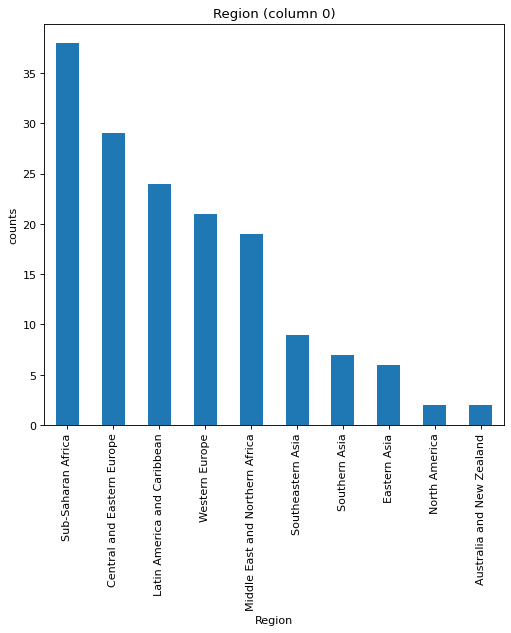

In [ ]:
plotPerColumnDistribution(df2, 10, 5)

Correlation matrix:

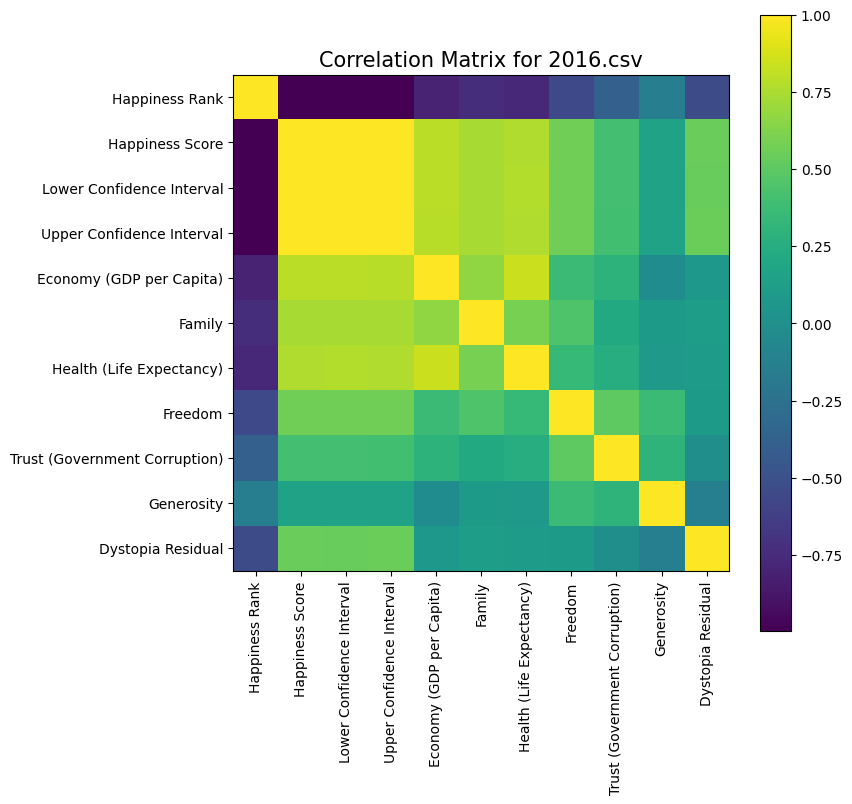

In [ ]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

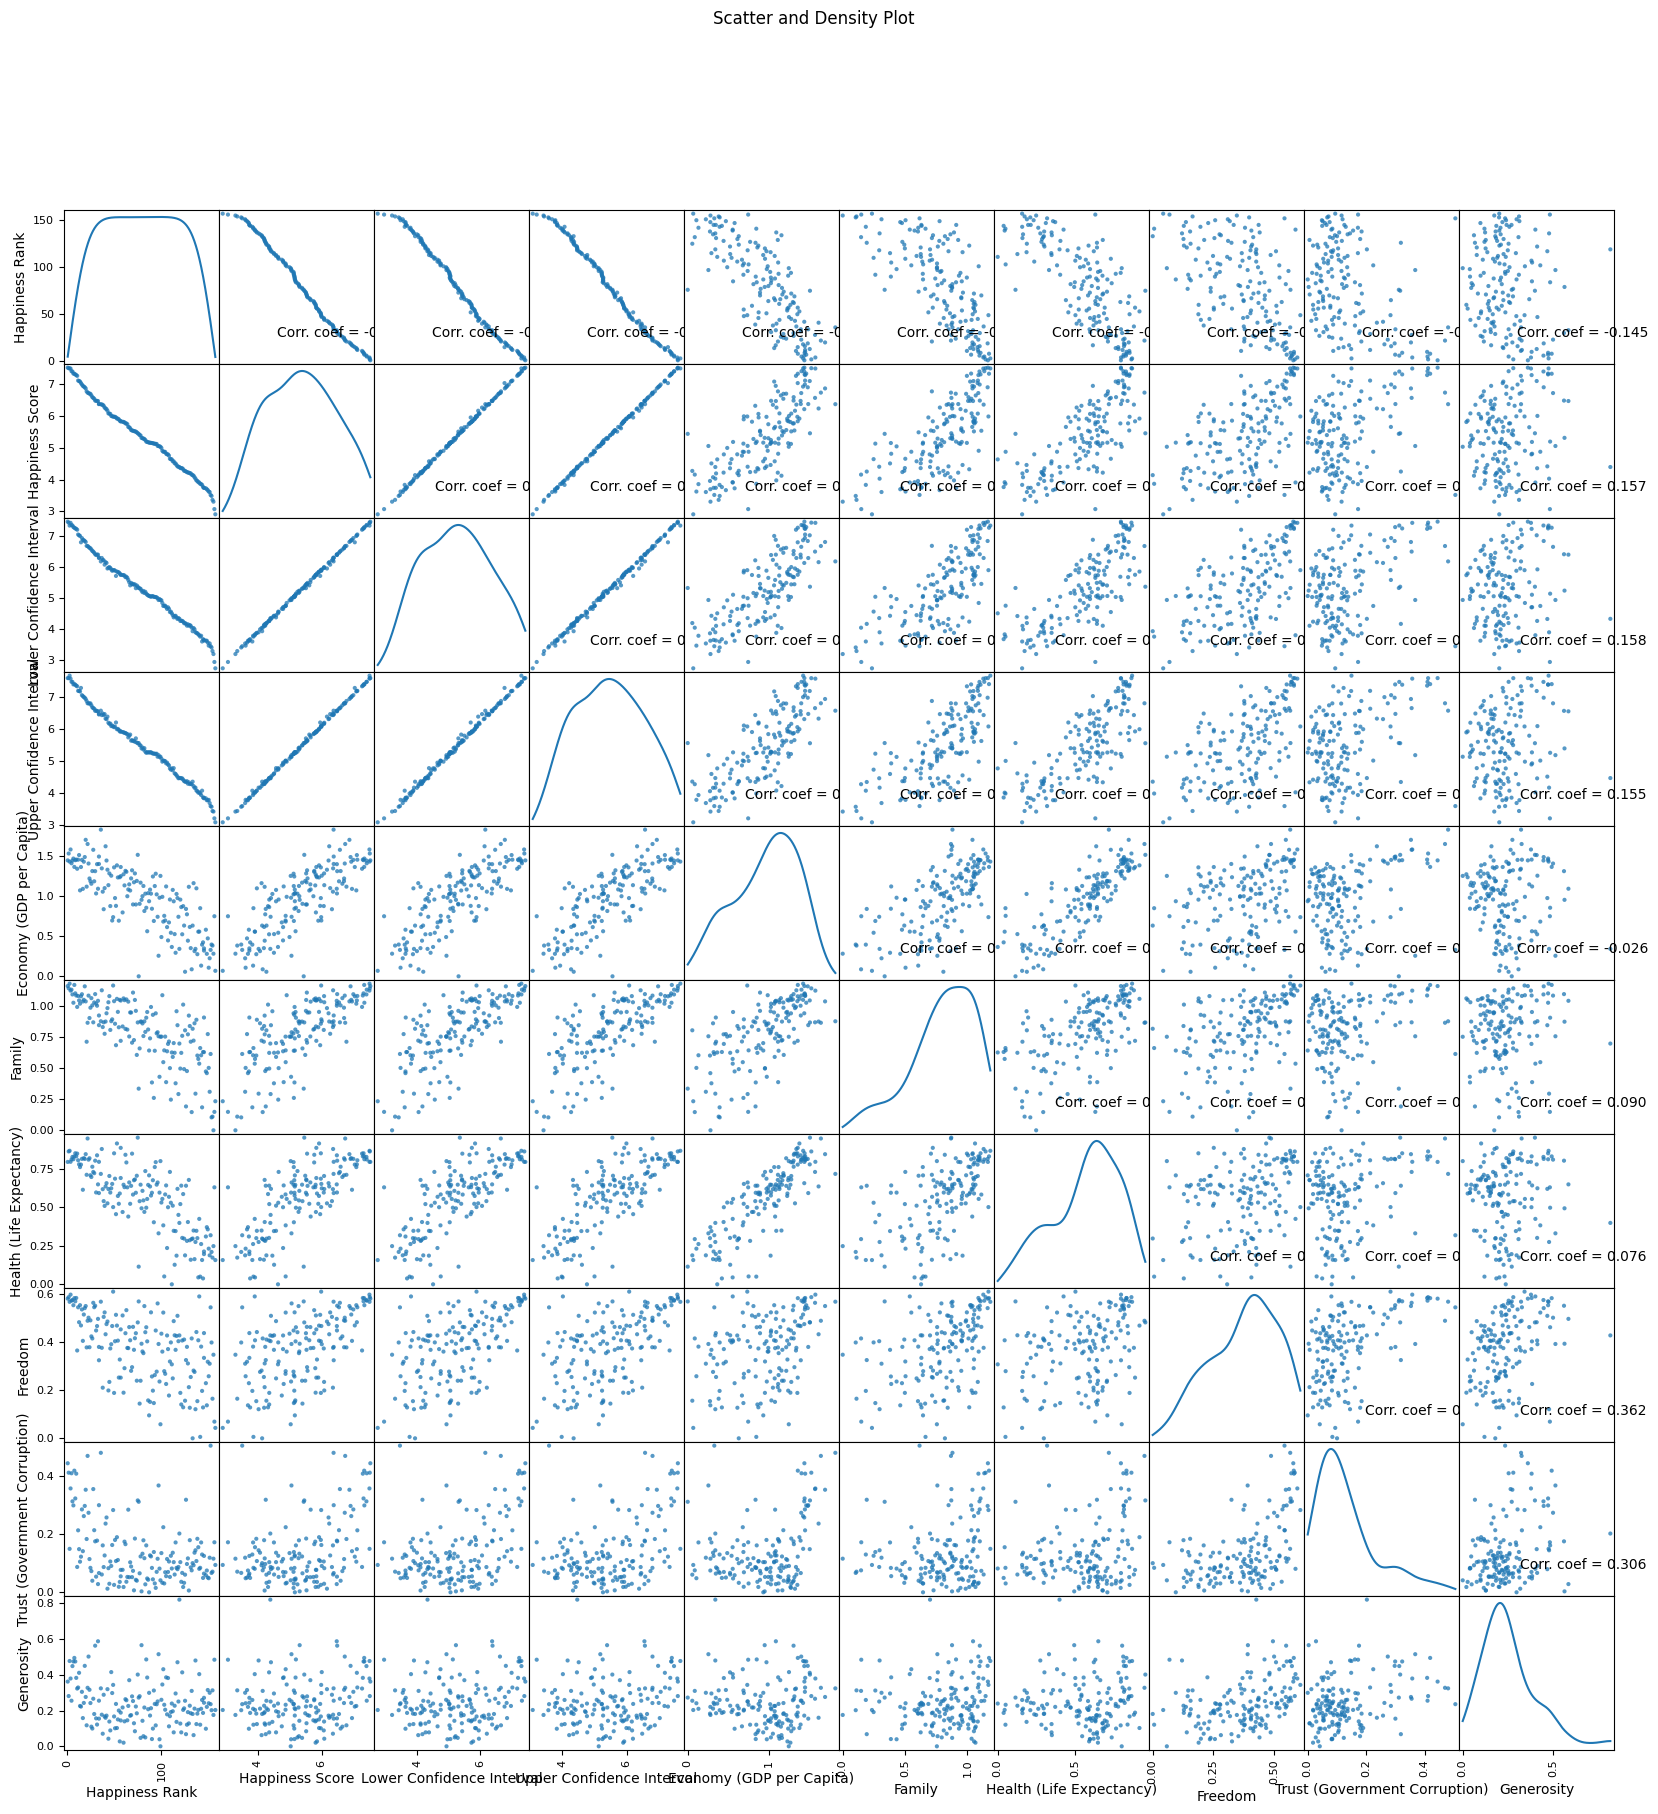

In [ ]:
plotScatterMatrix(df2, 20, 10)

### Let's check 3rd file: ../input/2017.csv

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df3 = pd.read_csv(os.path.join(unsdsn_world_happiness_path, '2017.csv'), delimiter=',', nrows = nRowsRead)
df3.dataframeName = '2017.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 155 rows and 12 columns


Let's take a quick look at what the data looks like:

In [ ]:
df3.head(5)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df3, 10, 5)

No columns to plot based on filtering criteria.


Correlation matrix:

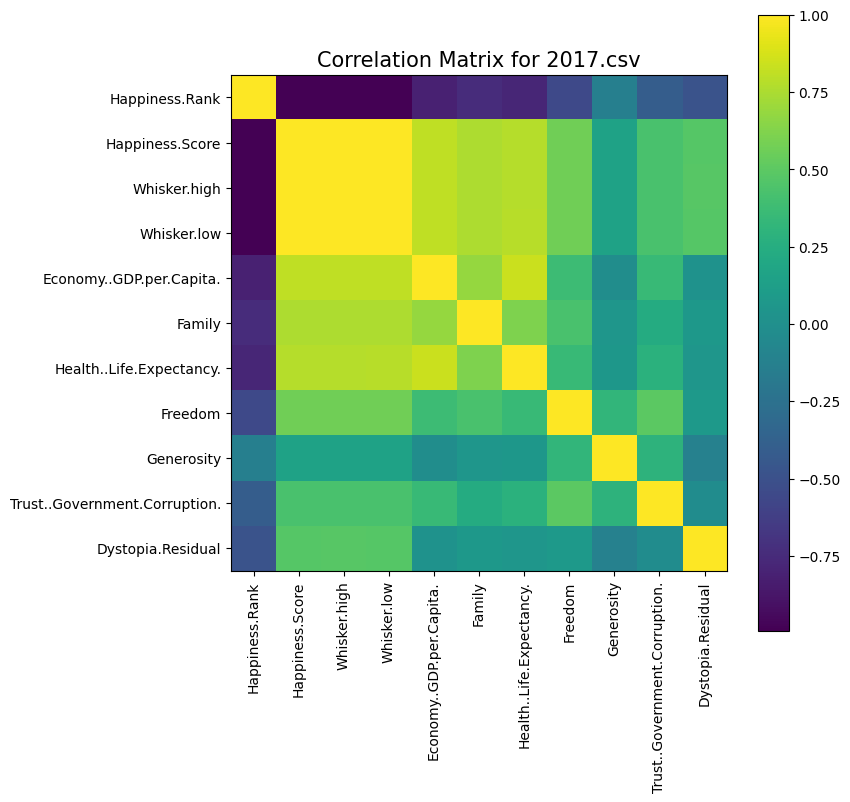

In [ ]:
plotCorrelationMatrix(df3, 8)

Scatter and density plots:

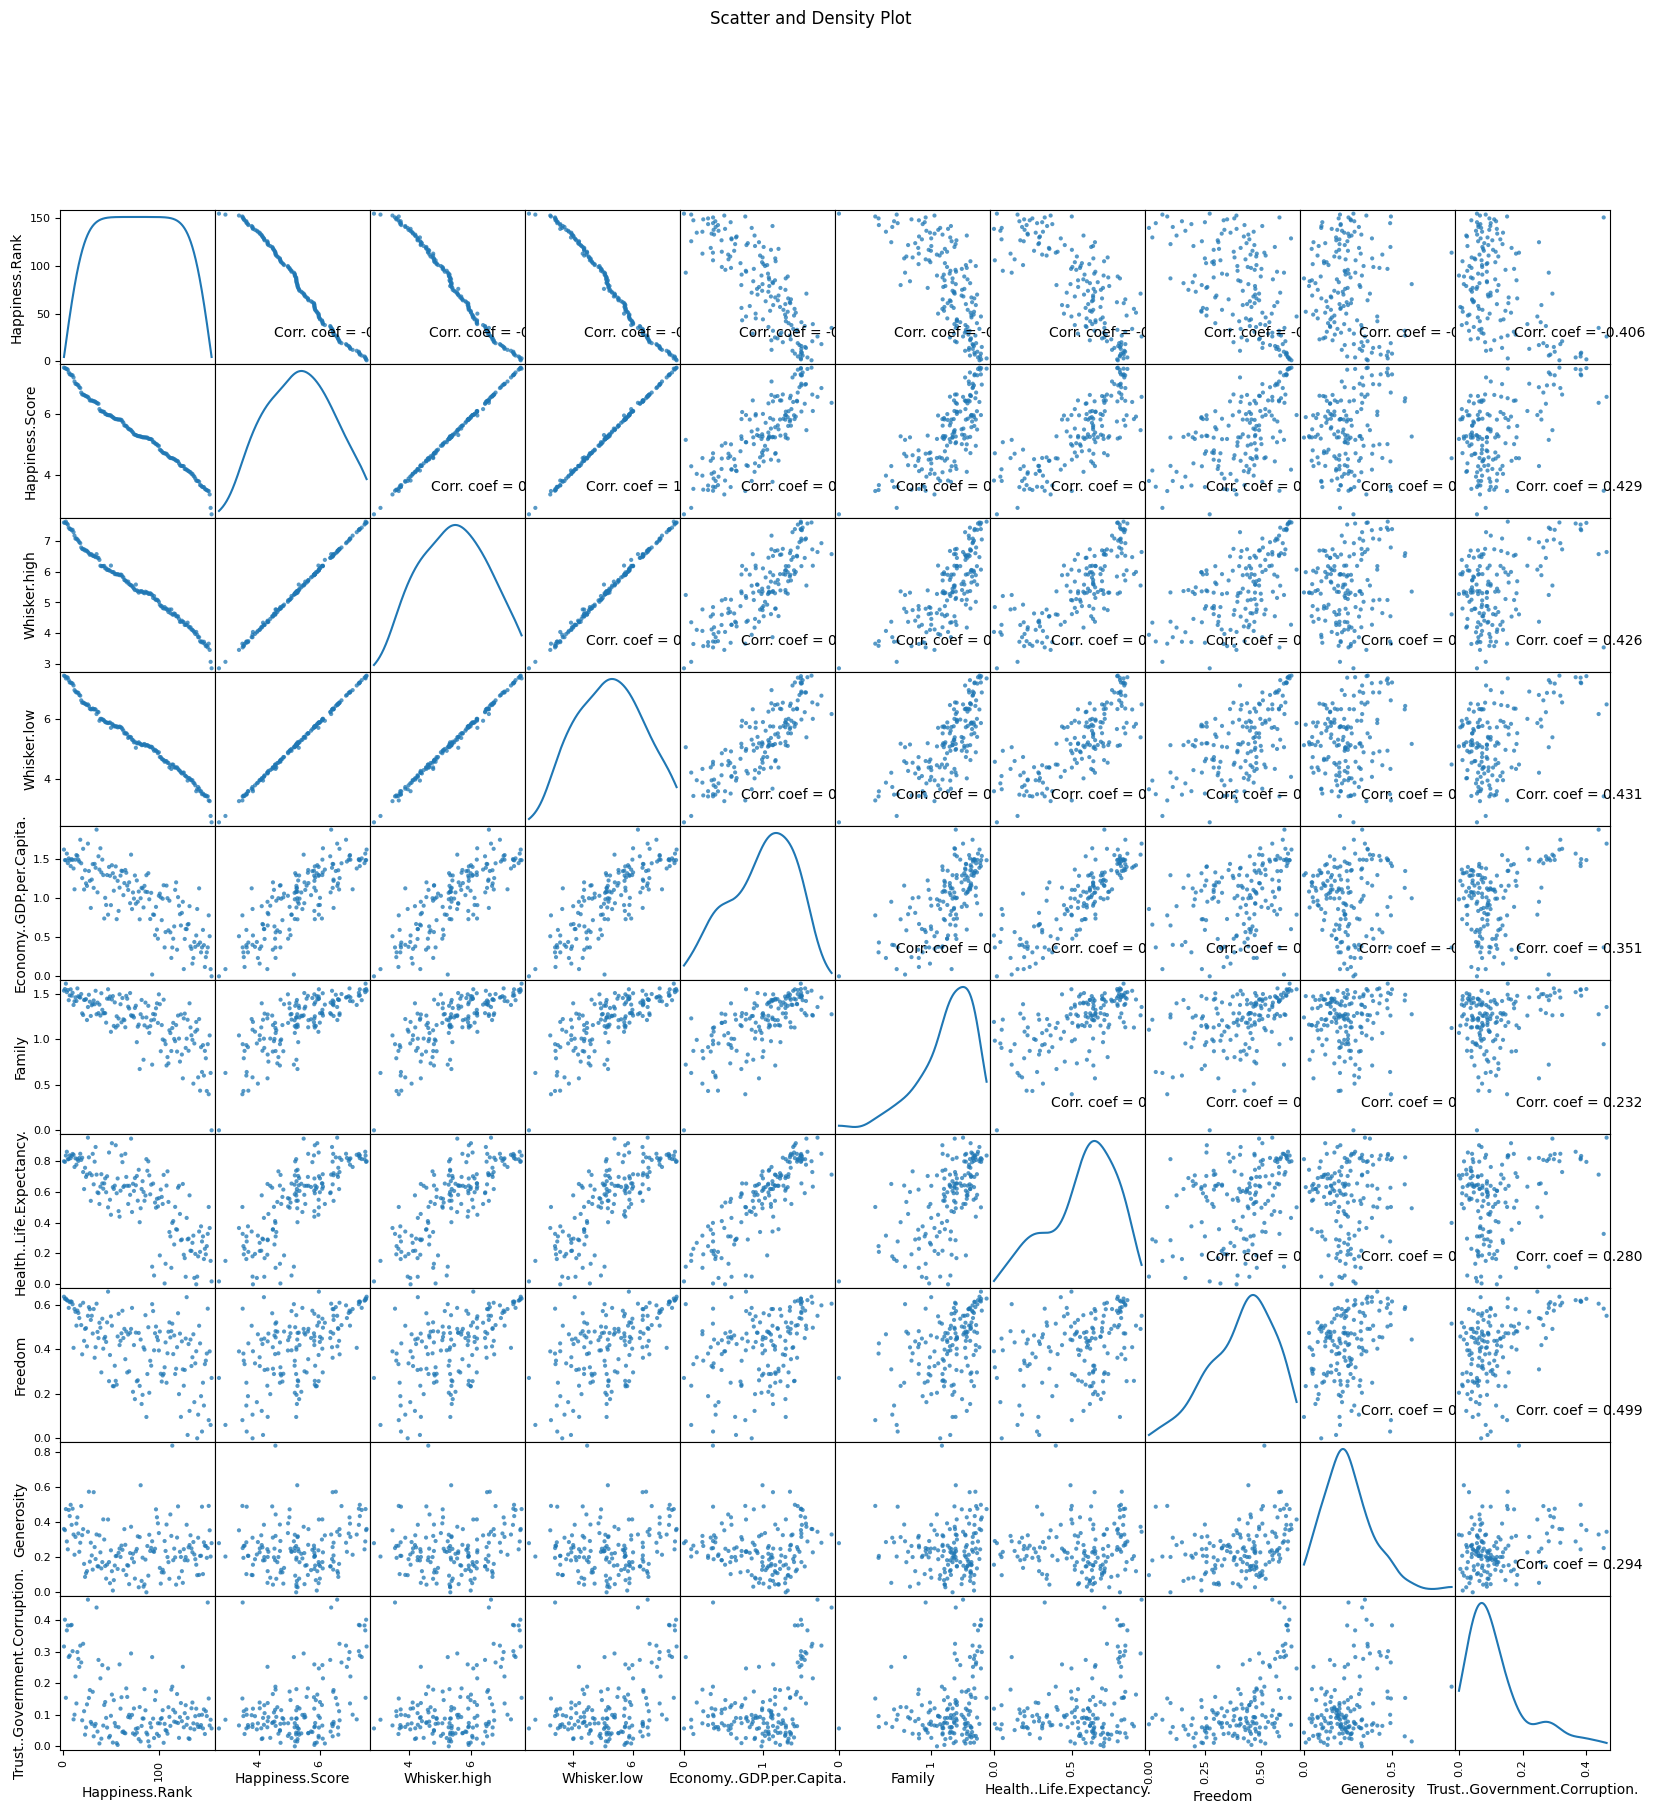

In [ ]:
plotScatterMatrix(df3, 20, 10)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Edit Notebook" button at the top of the kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!

--- RÉSULTATS DES MODÈLES ---
Régression Linéaire R² : 0.8295
Random Forest R²       : 0.8148
(Plus le R² est proche de 1, meilleure est la prédiction)

--- CE QUI REND LES GENS HEUREUX (Importance des variables) ---
Economy (GDP per Capita)         0.419488
Family                           0.194000
Health (Life Expectancy)         0.186089
Freedom                          0.099403
Trust (Government Corruption)    0.056156
Generosity                       0.044865
dtype: float64


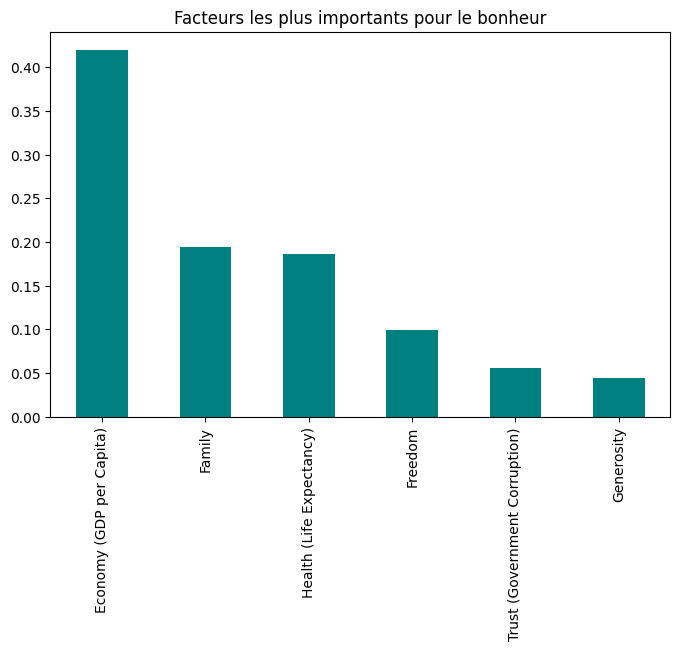

In [ ]:
# --- PARTIE MACHINE LEARNING (OBLIGATOIRE POUR LE PROJET) ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting

# 1. Sélection des données
# On utilise les colonnes numériques pour prédire le "Score"
features = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
            'Freedom', 'Generosity', 'Trust (Government Corruption)'] # Renamed features to match df1
target = 'Happiness Score' # Renamed target to match df1

# Using df1 for the model (you can change this to df2 or df3 if preferred)
X = df1[features].fillna(0)
y = df1[target]

# 2. Séparation (Entraînement vs Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entraînement de 2 modèles
model_lr = LinearRegression()
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# 4. Évaluation
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

print("--- RÉSULTATS DES MODÈLES ---")
print(f"Régression Linéaire R² : {r2_score(y_test, pred_lr):.4f}")
print(f"Random Forest R²       : {r2_score(y_test, pred_rf):.4f}")
print("(Plus le R² est proche de 1, meilleure est la prédiction)")

# 5. Feature Importance (Pour le rapport et la vidéo)
import pandas as pd
importance = pd.Series(model_rf.feature_importances_, index=features).sort_values(ascending=False)
print("\n--- CE QUI REND LES GENS HEUREUX (Importance des variables) ---")
print(importance)

# Graphique final
plt.figure(figsize=(8,5))
importance.plot(kind='bar', color='teal')
plt.title("Facteurs les plus importants pour le bonheur")
plt.show()

100%|██████████| 36.8k/36.8k [00:00<00:00, 44.7MB/s]

Extracting files...
✅ Données préparées et normalisées.

--- PERFORMANCE (CROSS-VALIDATION) ---
Régression Linéaire : Score R² Moyen = 0.7364 (+/- 0.0872)


Random Forest : Score R² Moyen = 0.7328 (+/- 0.1126)
SVR (Support Vector Regressor) : Score R² Moyen = 0.7322 (+/- 0.1006)

--- OPTIMISATION DU MEILLEUR MODÈLE (GridSearch) ---
Meilleurs paramètres trouvés : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Meilleur Score R² après optimisation : 0.7442

--- RÉSULTATS FINAUX (Sur données de Test) ---
Modèle retenu : Random Forest Optimisé
RMSE (Erreur Moyenne) : 0.4844
R² (Précision) : 0.8194


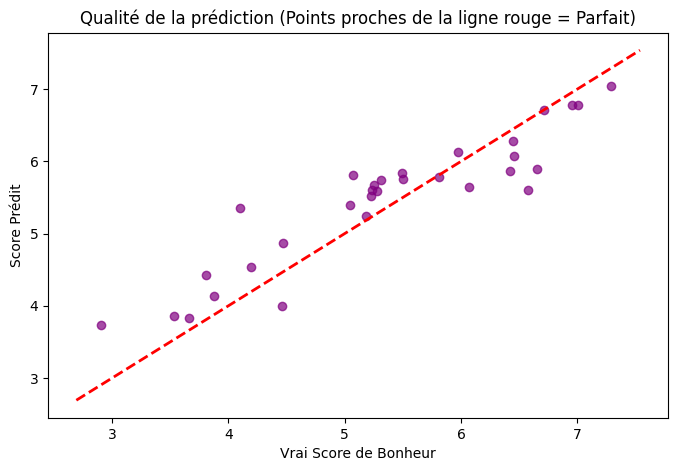

In [5]:
# ==============================================================================
# SECTION 3 : MODÉLISATION AVANCÉE (Conforme aux critères 3.2.3)
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # Ensure os is imported for path operations
import kagglehub

# Importation des outils ML nécessaires
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# --- Ensure df3 is loaded if not already in session (re-run from 9HliVibBb9LA) ---
nRowsRead = 1000 # specify 'None' if want to read whole file
# Define unsdsn_world_happiness_path here to ensure it's always available
unsdsn_world_happiness_path = kagglehub.dataset_download('unsdsn/world-happiness')

df3 = pd.read_csv(os.path.join(unsdsn_world_happiness_path, '2017.csv'), delimiter=',', nrows = nRowsRead)
df3.dataframeName = '2017.csv'
# Optional: print(f'There are {df3.shape[0]} rows and {df3.shape[1]} columns')

# ---------------------------------------------------------
# 1. PRÉPARATION DES DONNÉES
# ---------------------------------------------------------
# Variables prédictives (Features)
features = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
            'Freedom', 'Generosity', 'Trust..Government.Corruption.'] # Updated features for df3
target = 'Happiness.Score' # Updated target for df3

# Using df3 for the model, as its column names are closer to the intended features/target
df_clean = df3.fillna(0) # Changed df to df3
X = df_clean[features]
y = df_clean[target]

# Split Train/Test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation (Indispensable pour SVR et Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Données préparées et normalisées.")

# ---------------------------------------------------------
# 2. COMPARAISON DE 3 MODÈLES (Critère: "Testez au moins 3 algos")
# ---------------------------------------------------------
models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR (Support Vector Regressor)": SVR()
}

results = {}

print("\n--- PERFORMANCE (CROSS-VALIDATION) ---")
# On utilise la Cross-Validation pour être rigoureux (Critère: "Validation rigoureuse")
for name, model in models.items():
    # cv=5 signifie qu'on teste le modèle 5 fois sur des bouts différents
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    results[name] = cv_scores.mean()
    print(f"{name} : Score R² Moyen = {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# ---------------------------------------------------------
# 3. OPTIMISATION (GridSearch) (Critère: "Optimisez les hyperparamètres")
# ---------------------------------------------------------
print("\n--- OPTIMISATION DU MEILLEUR MODÈLE (GridSearch) ---")
# On va optimiser le Random Forest qui est souvent le meilleur
param_grid = {
    'n_estimators': [50, 100, 200], # Nombre d'arbres
    'max_depth': [None, 10, 20],    # Profondeur max
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print(f"Meilleurs paramètres trouvés : {grid_search.best_params_}")
print(f"Meilleur Score R² après optimisation : {grid_search.best_score_:.4f}")

# ---------------------------------------------------------
# 4. ÉVALUATION FINALE SUR LE TEST SET
# ---------------------------------------------------------
y_pred = best_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n--- RÉSULTATS FINAUX (Sur données de Test) ---")
print(f"Modèle retenu : Random Forest Optimisé")
print(f"RMSE (Erreur Moyenne) : {rmse:.4f}")
print(f"R² (Précision) : {r2:.4f}")

# Visualisation : Prédiction vs Réalité
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Ligne idéale
plt.xlabel("Vrai Score de Bonheur")
plt.ylabel("Score Prédit")
plt.title("Qualité de la prédiction (Points proches de la ligne rouge = Parfait)")
plt.show()

### 4.1. Comparaison par Cross-Validation

Nous évaluons les performances initiales de la **Régression Linéaire**, de la **Forêt Aléatoire** (Random Forest) et du **SVR** (Support Vector Regressor) en utilisant une validation croisée (K-Fold) avec le score $R^2$.

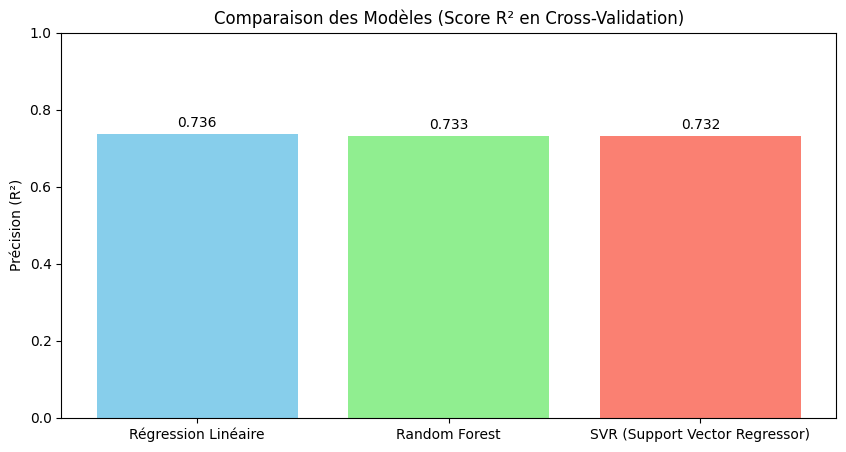

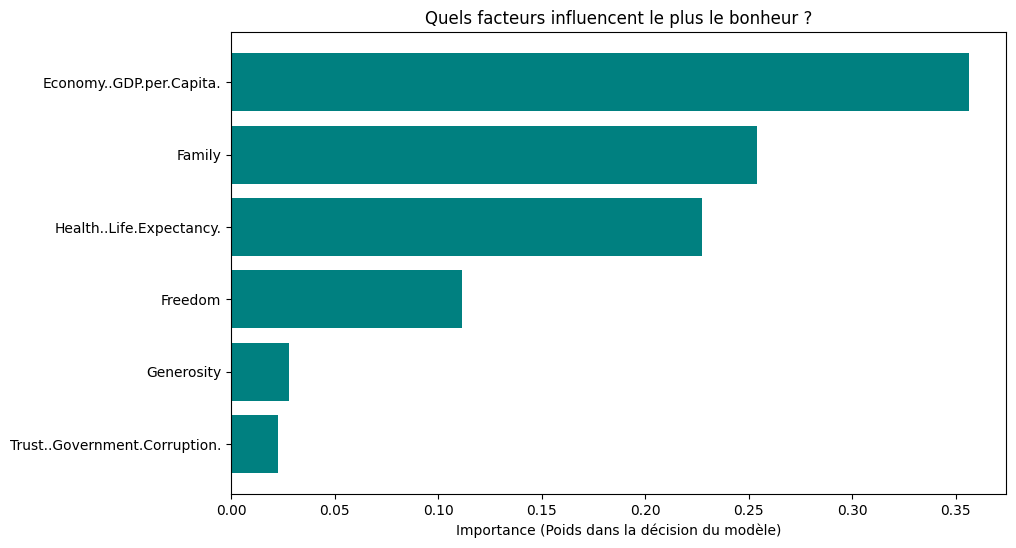

In [6]:
# =======================================================
# PARTIE BONUS : VISUALISATION POUR LE RAPPORT
# =======================================================

import matplotlib.pyplot as plt
import pandas as pd

# GRAPHIQUE 1 : Comparaison des performances des 3 modèles
# On reprend les scores calculés juste avant
model_names = list(results.keys())
model_scores = list(results.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(model_names, model_scores, color=['skyblue', 'lightgreen', 'salmon'])

# On ajoute le chiffre au dessus de chaque barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

plt.ylim(0, 1) # L'échelle va de 0 à 1
plt.title("Comparaison des Modèles (Score R² en Cross-Validation)")
plt.ylabel("Précision (R²)")
plt.show()

# GRAPHIQUE 2 : Qu'est-ce qui rend heureux ? (Feature Importance)
# On regarde ce que le Random Forest a trouvé le plus important
importances = best_model.feature_importances_
feature_names = features

# Création d'un petit tableau pour trier
df_imp = pd.DataFrame({'Variable': feature_names, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=True) # Trié pour le graphique

plt.figure(figsize=(10, 6))
plt.barh(df_imp['Variable'], df_imp['Importance'], color='teal')
plt.title("Quels facteurs influencent le plus le bonheur ?")
plt.xlabel("Importance (Poids dans la décision du modèle)")
plt.show()

## 5. Conclusion et Perspectives

**Conclusion :** Le modèle de Forêt Aléatoire optimisé est le plus performant (R2 = 0.8194) et confirme l'importance des facteurs économiques et sanitaires comme principaux moteurs du bonheur.

**Limites et Améliorations :**
1.  **Limites :** Le modèle pourrait ne pas bien généraliser aux changements brusques (guerres, catastrophes) non représentés dans les données de 2016. Nous n'avons pas analysé les résidus pour vérifier l'homoscédasticité.
2.  **Améliorations :** Tester d'autres algorithmes (XGBoost), effectuer une ingénierie de variables plus poussée, ou utiliser des données temporelles (plusieurs années) pour capturer les tendances dynamiques.